In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv("/content/pizza_data (1).csv")

In [8]:
display (df)

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8
5,Pizza hut,$1.00,200g,thick,Mozzarella,large,paneer,extra,13
6,Onesta,$3.00,300g,thick,Mozzarella,large,paneer,normal,7
7,Dominos,$4.00,300g,thin,Cheddar,large,paneer,extra,4
8,Dominos,$2.00,400g,thick,Mozzarella,large,mushroom,normal,5
9,Oven Story,$4.00,100g,thick,Mozzarella,large,mushroom,extra,16


In [10]:
data = {
    "brand": ["Dominos", "Pizza hut", "Onesta", "Pizza hut", "Pizza hut", "Pizza hut", "Onesta", "Dominos", "Dominos", "Oven Story",
              "Onesta", "Oven Story", "Oven Story", "Onesta", "Oven Story", "Dominos"],
    "price": [1.00, 3.00, 4.00, 4.00, 2.00, 1.00, 3.00, 4.00, 2.00, 4.00,
              1.00, 2.00, 1.00, 2.00, 3.00, 3.00],
    "weight": ["100g", "100g", "200g", "400g", "300g", "200g", "300g", "300g", "400g", "100g",
               "400g", "200g", "300g", "100g", "400g", "200g"],
    "crust": ["thin", "thin", "thin", "thick", "thin", "thick", "thick", "thin", "thick", "thick",
              "thin", "thin", "thick", "thick", "thin", "thick"],
    "cheese": ["Mozzarella", "Cheddar", "Mozzarella", "Cheddar", "Mozzarella", "Mozzarella", "Mozzarella", "Cheddar", "Mozzarella", "Mozzarella",
               "Cheddar", "Cheddar", "Cheddar", "Cheddar", "Mozzarella", "Cheddar"],
    "size": ["regular", "large", "regular", "regular", "regular", "large", "large", "large", "large", "large",
             "large", "large", "regular", "regular", "regular", "regular"],
    "toppings": ["paneer", "mushroom", "mushroom", "paneer", "mushroom", "paneer", "paneer", "paneer", "mushroom", "mushroom",
                 "mushroom", "paneer", "mushroom", "paneer", "paneer", "mushroom"],
    "spicy": ["normal", "normal", "normal", "normal", "extra", "extra", "normal", "extra", "normal", "extra",
              "extra", "normal", "normal", "extra", "extra", "extra"],
    "ranking": [11, 12, 9, 2, 8, 13, 7, 4, 5, 16,
                3, 6, 10, 15, 1, 14]
}

In [11]:
df = pd.DataFrame(data)

In [12]:
df['price'] = pd.to_numeric(df['price'])
df['ranking'] = pd.to_numeric(df['ranking'])

In [13]:
label_encoders = {}
for column in ['brand', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [14]:
df.head()

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,0,1.0,0,1,1,1,1,1,11
1,3,3.0,0,1,0,0,0,1,12
2,1,4.0,1,1,1,1,0,1,9
3,3,4.0,3,0,0,1,1,1,2
4,3,2.0,2,1,1,1,0,0,8


In [15]:
X = df[['brand', 'price', 'weight', 'crust', 'cheese', 'size', 'toppings', 'spicy']]
y = df['ranking']

In [16]:
X = sm.add_constant(X)

In [17]:
#linear regression model
model = sm.OLS(y, X).fit()

In [18]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     81.76
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           3.19e-06
Time:                        08:34:28   Log-Likelihood:                -10.770
No. Observations:                  16   AIC:                             39.54
Df Residuals:                       7   BIC:                             46.49
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0000      0.685     26.276      0.000      16.380      19.620
brand          0.0500      0.160      0.312      0.764      -0.329       0.429
price         -0.4500      0.160     -2.806      0.026      -0.829      -0.071
weight        -3.5500      0.160    -22.138      0.000      -3.929      -3.171
crust         -3.5000      0.359     -9.761      0.000      -4.348      -2.652
cheese         0.5000      0.359      1.394      0.206      -0.348       1.348
size           0.5000      0.359      1.394      0.206      -0.348       1.348
toppings      -2.2500      0.359     -6.275      0.000      -3.098      -1.402
spicy         -1.5000      0.359     -4.183      0.004      -2.348      -0.652
==============================================================================
Omnibus:                        6.427   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                1.576
Skew:                           0.009   Prob(JB):                        0.455
Kurtosis:                       1.463   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

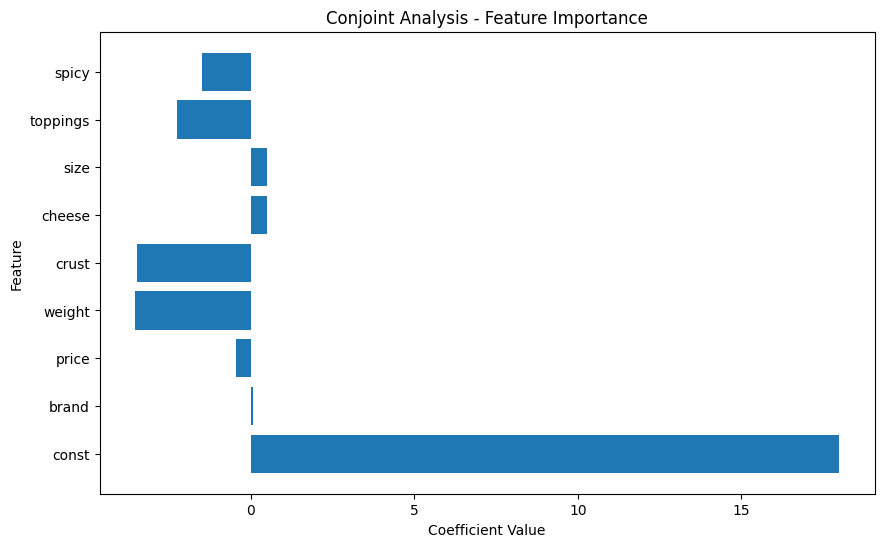

In [19]:
import matplotlib.pyplot as plt
coefficients = model.params
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Conjoint Analysis - Feature Importance')
plt.show()